# 3803ICT Big Data Analysis

<p>Junghee Yang s5124191<br></p>
<p>Yunpeng Huang s5056747<br></p>

## Part 1 - Data Preparation and Preprocessing

In [1]:
import pandas as pd

In [2]:
# Import data
df = pd.read_csv('data.csv')
df.head()

/Users/katyang/opt/miniconda3/envs/3803ict/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (0,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


### 1) Description of the dataset

As shown in the cell below, this dataset is consist of 13 categories - Id, Title, Company, Date, Location, Area, Classification, SubClassification, Requirement, FullDescription, LowestSalary, HighestSalary, JobType.

The dataset has 318,477 entities with the data type as an object except for salaries that is integers. Data type of Id and Date columns are converted properly for analysis.


In [3]:
# Categories (Columns) of the datset
for i in df.columns:
    print(i, end=', ')

Id, Title, Company, Date, Location, Area, Classification, SubClassification, Requirement, FullDescription, LowestSalary, HighestSalary, JobType, 

In [4]:
# Shape of the dataset
df.shape

(318477, 13)

In [5]:
# Data types for each columns
df.dtypes

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

### 2) Steps for data preparation and preprocessing

The dataset is imported using the Pandas library at the top of this report. Based on the missing data percentage list, the Area column has the most missing values, 61%. Location, Classification, and SubClassification columns have missing data that consist of 38%.
The goal of normalization is to change the values of numeric columns in the dataset to a standard scale without distorting differences in the ranges of values. However, the only numeric columns in the dataset are LowestSalary and HighestSalary, which both have the same range and scale. Therefore, We decided not to normalize the data. 
Duplicated or null values are dropped using the Pandas library function. 

#### Data type

In [6]:
# Conver data types for each columns
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%dT%H:%M:%S.000Z')
# Data types for each columns
df.dtypes

Id                           object
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object

In [7]:
# Add the average salary column
df['AverageSalary'] = (df["LowestSalary"] + df["HighestSalary"])/2 

#### NULL values

In [8]:
# Count NA
df.isna().sum()

Id                        0
Title                     0
Company               12004
Date                      0
Location             121248
Area                 195819
Classification       121248
SubClassification    121248
Requirement               7
FullDescription       16175
LowestSalary              0
HighestSalary             0
JobType               16098
AverageSalary             0
dtype: int64

In [9]:
df.shape

(318477, 14)

In [10]:
# Remove missing values
df = df.dropna(axis=0)
df.shape

(111109, 14)

#### Cleaning text

In [11]:
df['FullDescription'] = df["FullDescription"].str.lower()
df['FullDescription']

121       <p>&nbsp;</p>\n        <p><strong><em>*&nbsp; ...
122       <p>one of australia's best engineering worksho...
125       <p style="text-align:center;"><strong>what is ...
126       <p>this australian icon, connects the people o...
127       <strong>the company</strong><br> <br> this org...
                                ...                        
197216    <p>myhouse is a successful, family owned retai...
197217    <ul>\n          <li><strong>work on a large ba...
197218    <p>leading financial sector is seeking an it t...
197222    <p>this privately owned leading national const...
197225    <ul>\n          <li>growing &amp; financially ...
Name: FullDescription, Length: 111109, dtype: object

In [17]:
def remove_html(text):
    html_pattern = re.compile('<[^>]+>')
    return html_pattern.sub(r'', text)
df['FullDescription'] = df['FullDescription'].apply(lambda text: remove_html(text))

In [18]:
punct_str = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punct_str))

df['FullDescription'] = df['FullDescription'].apply(lambda text: remove_punctuation(text))

In [19]:
def remove_newline(text):
    newline_pattern = re.compile('\n')
    return newline_pattern.sub(r'', text)
df['FullDescription'] = df['FullDescription'].apply(lambda text: remove_newline(text))

In [20]:
SPW = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in SPW])
df['FullDescription'] = df['FullDescription'].apply(lambda text: remove_stopwords(text))

In [21]:
cnt = Counter()
for text in df['FullDescription'].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)

[('experience', 240110),
 ('work', 188490),
 ('team', 188070),
 ('role', 187766),
 ('skills', 146806),
 ('nbsp', 144067),
 ('business', 124181),
 ('management', 111722),
 ('working', 110623),
 ('please', 99027)]

In [22]:
n_rare_words = 40
result = Counter({x: count for x, count in cnt.items() if count < n_rare_words})
RAREWORDS = set([w for w in result])
def remove_rarewords(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["FullDescription"] = df["FullDescription"].apply(lambda text: remove_rarewords(text))

In [23]:
def remove_url(text):
    html_pattern = re.compile('http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+')
    return html_pattern.sub(r'', text)
df['FullDescription'] = df['FullDescription'].apply(lambda text: remove_url(text))

In [24]:
def remove_nbsp(text):
    html_pattern = re.compile('nbsp')
    return html_pattern.sub(r'', text)
df['FullDescription'] = df['FullDescription'].apply(lambda text: remove_nbsp(text))

In [25]:
regex_str = [
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if tokens_re.search(token) else token.lower() for token in tokens]
    return tokens

#original_documents = [x.strip() for x in df['FullDescription']]
#documents = [preprocess(d) for d in original_documents]
#documents[0]

### 3) Hypothesis of the analysis outcome

<p>
We are hoping to find the correlation between: <br>
    - the location and the salary<br>
    - Job type and the salary<br>
    - Classification and the salary<br> 
    - Skills and the salary<br> 
and read trends in the job market for finding the most desired skills for occupations or a job matching services. 
</p>

## Part 2 – Data Analysis and Interpretation

#### Import libraries 

In [60]:
import re
from collections import Counter
import string
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
import string
from nltk.corpus import stopwords
import math
from collections import Counter
import pprint 
from nltk.util import ngrams
pp = pprint.PrettyPrinter(indent=4)

#### 1) Study the job metadata. Extract the relevant information to describe the job’s attributes.

In [26]:
df['JobType'].value_counts()

Full Time          74822
Contract/Temp      20550
Casual/Vacation     8224
Part Time           7513
Name: JobType, dtype: int64

In [27]:
df['Company'].value_counts()

Jora Local                               4148
Design & Build                            706
Robert Walters                            610
Hudson                                    566
Hays Accountancy & Finance                472
                                         ... 
RMEM Engineering                            1
Paul Malouf Chartered Accountants           1
Playfair Visa and Migration Services        1
Sequel Drill & Blast Pty Ltd                1
Southern Suburbs Physiotherapy Centre       1
Name: Company, Length: 19277, dtype: int64

In [28]:
# jobs count by classification (job sector)
total_sectors = df['Classification'].value_counts()
print(total_sectors)
print("total unqiue sectors:", len(total_sectors))

Information & Communication Technology    14713
Hospitality & Tourism                      8471
Trades & Services                          8450
Manufacturing, Transport & Logistics       7542
Healthcare & Medical                       7223
Accounting                                 6595
Administration & Office Support            6000
Education & Training                       5385
Sales                                      4862
Construction                               4671
Retail & Consumer Products                 4622
Engineering                                3648
Government & Defence                       3245
Banking & Financial Services               3181
Legal                                      3036
Human Resources & Recruitment              2852
Marketing & Communications                 2767
Call Centre & Customer Service             2749
Real Estate & Property                     2509
Community Services & Development           1991
Design & Architecture                   

In [29]:
# sub-sectors
df['SubClassification'].value_counts()

Other                                  5762
Management                             3428
Developers/Programmers                 2869
Administrative Assistants              2624
Warehousing, Storage & Distribution    2499
                                       ... 
Local Government                          5
Computer Operators                        5
Agronomy & Farm Services                  4
Air Force                                 3
Army                                      1
Name: SubClassification, Length: 337, dtype: int64

In [30]:
# amount of companies that are posting jobs
print("companies in dataset:", len(df['Company'].value_counts()))

companies in dataset: 19277


#### 2) Study the market by locations.

In [31]:
df['Location'].value_counts()

Sydney       49174
Melbourne    37156
Brisbane     15658
Perth         9121
Name: Location, dtype: int64

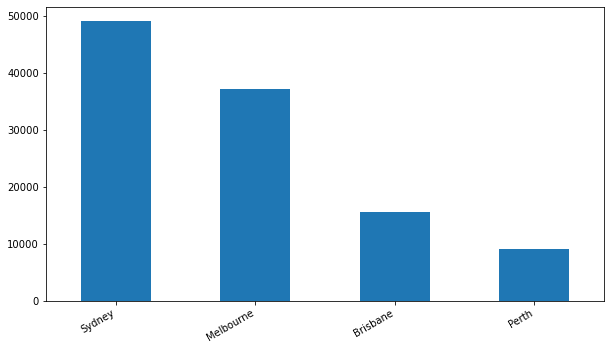

In [32]:
f, ax = plt.subplots(figsize=(10, 6))
# top 10 job posting location
df['Location'].value_counts().plot(kind='bar')
f.autofmt_xdate()
plt.show()

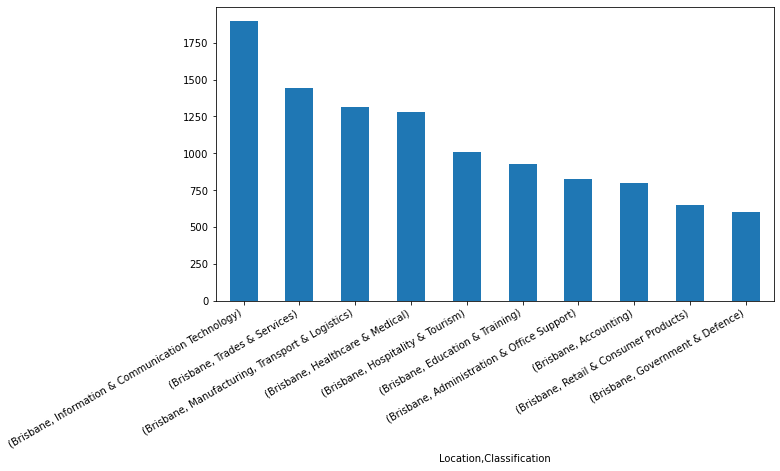

In [33]:
# top 10 location sorted by job sector
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('Location')['Classification'].value_counts().head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()

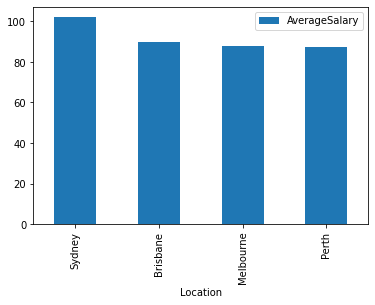

In [34]:
# show average salary by sorted by location : mean (fix formatting later?, prob not) 
df.groupby('Location').agg({'AverageSalary':'mean'}).sort_values(by='AverageSalary', ascending=False).head(10).plot(kind='bar')
plt.show()

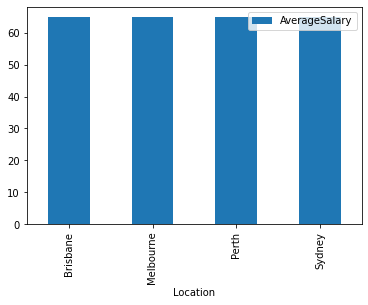

In [35]:
# average salary sorted by location (median, might be better, since there is a significant amount of 0s)
df.groupby('Location').agg({'AverageSalary':'median'}).sort_values(by='AverageSalary', ascending=False).head(10).plot(kind='bar')
plt.show()

#### 3) Study the market by sectors.

In [36]:
# could use some touch up later
df['Classification'].value_counts()

Information & Communication Technology    14713
Hospitality & Tourism                      8471
Trades & Services                          8450
Manufacturing, Transport & Logistics       7542
Healthcare & Medical                       7223
Accounting                                 6595
Administration & Office Support            6000
Education & Training                       5385
Sales                                      4862
Construction                               4671
Retail & Consumer Products                 4622
Engineering                                3648
Government & Defence                       3245
Banking & Financial Services               3181
Legal                                      3036
Human Resources & Recruitment              2852
Marketing & Communications                 2767
Call Centre & Customer Service             2749
Real Estate & Property                     2509
Community Services & Development           1991
Design & Architecture                   

In [37]:
# maybe need a clean up or a better way to visualise
df.groupby('Classification')['SubClassification'].value_counts()

Classification     SubClassification                     
Accounting         Financial Accounting & Reporting          867
                   Business Services & Corporate Advisory    744
                   Financial Managers & Controllers          639
                   Accounts Officers/Clerks                  608
                   Payroll                                   500
                                                            ... 
Trades & Services  Butchers                                   38
                   Locksmiths                                 19
                   Nannies & Babysitters                      19
                   Floristry                                  16
                   Tailors & Dressmakers                      16
Name: SubClassification, Length: 395, dtype: int64

In [38]:
df.groupby('Classification')['SubClassification'].value_counts()

Classification     SubClassification                     
Accounting         Financial Accounting & Reporting          867
                   Business Services & Corporate Advisory    744
                   Financial Managers & Controllers          639
                   Accounts Officers/Clerks                  608
                   Payroll                                   500
                                                            ... 
Trades & Services  Butchers                                   38
                   Locksmiths                                 19
                   Nannies & Babysitters                      19
                   Floristry                                  16
                   Tailors & Dressmakers                      16
Name: SubClassification, Length: 395, dtype: int64

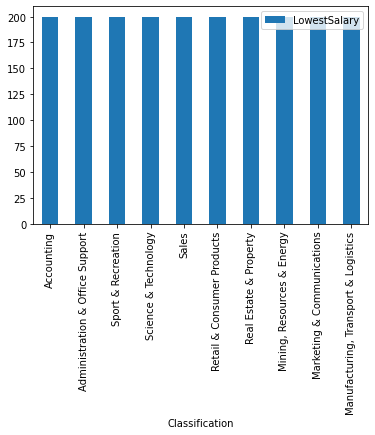

In [45]:
df.groupby('Classification').agg({'LowestSalary':'max'}).sort_values(by='LowestSalary', ascending=False).head(10).plot(kind='bar')
plt.show()

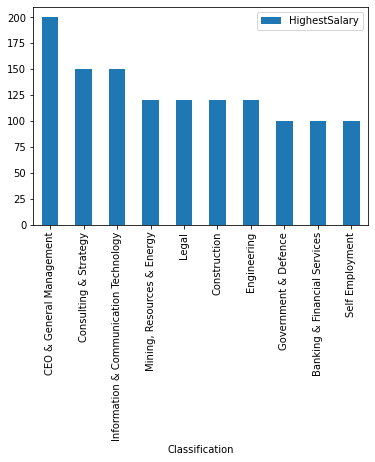

In [46]:
df.groupby('Classification').agg({'HighestSalary':'median'}).sort_values(by='HighestSalary', ascending=False).head(10).plot(kind='bar')
plt.show()

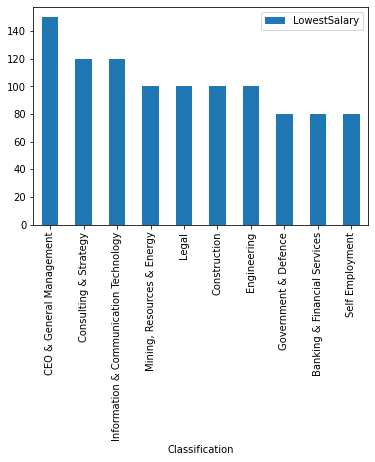

In [47]:
df.groupby('Classification').agg({'LowestSalary':'median'}).sort_values(by='LowestSalary', ascending=False).head(10).plot(kind='bar')
plt.show()

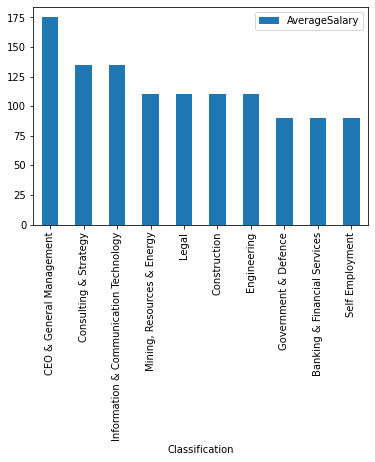

In [48]:
df.groupby('Classification').agg({'AverageSalary':'median'}).sort_values(by='AverageSalary', ascending=False).head(10).plot(kind='bar')
plt.show()

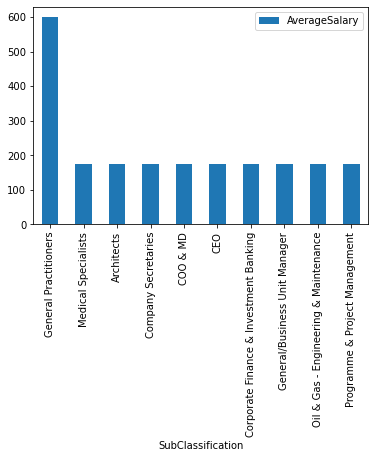

In [49]:
df.groupby('SubClassification').agg({'AverageSalary':'median'}).sort_values(by='AverageSalary', ascending=False).head(10).plot(kind='bar')
plt.show()

Trying step by step (would crash if i combine the functions together)

#### Skills found from FullDescription

In [51]:
cnt = Counter()
for text in df['FullDescription'].values:
    for word in text.split():
        cnt[word] += 1

In [52]:
cnt.most_common(10)

[('experience', 243461),
 ('team', 191270),
 ('role', 190796),
 ('work', 189446),
 ('skills', 149962),
 ('business', 125444),
 ('management', 112926),
 ('working', 110823),
 ('please', 99525),
 ('apply', 98509)]

In [53]:
def preferred_skills(x):
    temp = df[df['Classification']==x]
    cnt = Counter()
    for text in temp['FullDescription'].values:
        for word in text.split():
            cnt[word] += 1
    return dict(cnt.most_common(20))

In [54]:
# top 10 jobs sectors
popular_jobs = df['Classification'].value_counts()[:10]
popular_jobs

Information & Communication Technology    14713
Hospitality & Tourism                      8471
Trades & Services                          8450
Manufacturing, Transport & Logistics       7542
Healthcare & Medical                       7223
Accounting                                 6595
Administration & Office Support            6000
Education & Training                       5385
Sales                                      4862
Construction                               4671
Name: Classification, dtype: int64

In [55]:
test = df[df['Classification']==popular_jobs.index[0]]

In [56]:
df['FullDescription']

121         secure long term role genuine career path su...
122       one australias best engineering workshops hiri...
125       anzuk anzuk early recruitment agency provide e...
126       australian icon connects people world post rol...
127       company organisation wellestablished vast mark...
                                ...                        
197216    successful family owned retailer 40 stores thr...
197217    work large bank wide program banking code prac...
197218    leading financial sector seeking test test ana...
197222    privately owned leading national construction ...
197225    growing amp financially secure builder senior ...
Name: FullDescription, Length: 111109, dtype: object

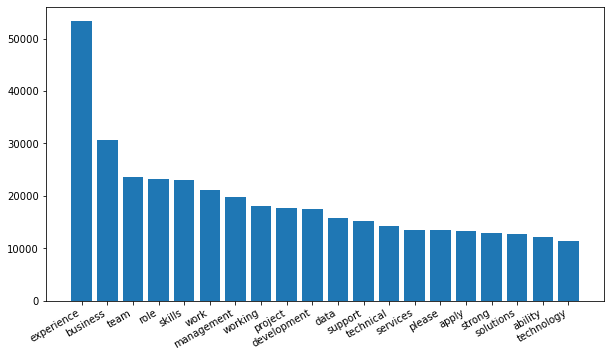

In [57]:
most_popular = preferred_skills(popular_jobs.index[0])
f, ax = plt.subplots(figsize=(10, 6))
plt.bar(most_popular.keys(), most_popular.values())
f.autofmt_xdate()
plt.show()

#### Skills found from Requirement

In [62]:
# Lowercase all Requirements
df['Requirement'] = df['Requirement'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove punctuation
df['Requirement'] = df['Requirement'].str.replace('[^\w\s]','')

# Remove stopwords
stop = stopwords.words('english')
df['Requirement'] = df['Requirement'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


# Requirement analysis
temp = pd.DataFrame(df['Classification'])
temp['Reqirement'] = df['Requirement']
classification = temp['Classification'].unique()

# Create job_cls dict to save all Requirement for each Classification
job_cls = {}
for i in classification:
    job_cls[i] = ""

# Concat Requirement for each Classification    
arr_temp = temp.to_numpy()
for i in arr_temp:
    job_cls[i[0]] += i[1]


# Most frequent phrases for each Classification 
most_freq_phrases = {}

for key, item in job_cls.items():
    most_freq_phrases[key] = list(ngrams(item.split(' '), 2))


for key, item in most_freq_phrases.items():
    print(f'|  Required skills for [{key}] jobs')
    counter = 1
    for i in item:
        if 'skill' in i[1]:            
            print(f'|   - {i[0]} {i[1]}')
            counter += 1
            if counter > 5:
                break

    print("|--------------------------------------------------------------------------------")

/Users/katyang/opt/miniconda3/envs/3803ict/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


|  Required skills for [Trades & Services] jobs
|   - person skills
|   - proficient skills
|   - weldingfabrication skillstlr
|   - passion skills
|   - servicingseeking skilled
|--------------------------------------------------------------------------------
|  Required skills for [Education & Training] jobs
|   - enthusiastic skilled
|   - want skills
|   - highly skilled
|   - highly skilled
|   - highly skilled
|--------------------------------------------------------------------------------
|  Required skills for [Engineering] jobs
|   - strong skills
|   - looking skilled
|   - vision skilled
|   - ownership upskill
|   - facing skills
|--------------------------------------------------------------------------------
|  Required skills for [Information & Communication Technology] jobs
|   - support skills
|   - service skills
|   - managerial skillsmiddleware
|   - lead skills
|   - vmware skills
|--------------------------------------------------------------------------------
| 

### Seaonality

In [63]:
location_posting = df.groupby('Date')['Location'].value_counts()
location_posting = location_posting.to_frame('count').reset_index().set_index('Date')

In [64]:
# four locations
syd_posting = location_posting[location_posting.Location == 'Sydney']
melb_posting = location_posting[location_posting.Location == 'Melbourne']
perth_posting = location_posting[location_posting.Location == 'Perth'] 
bris_posting = location_posting[location_posting.Location == 'Brisbane'] 

In [65]:
# change to month start
syd_posting_ms = syd_posting.resample("MS")['count'].agg(['sum']).reset_index()
melb_posting_ms = melb_posting.resample("MS")['count'].agg(['sum']).reset_index()
perth_posting_ms = perth_posting.resample("MS")['count'].agg(['sum']).reset_index()
bris_posting_ms = bris_posting.resample("MS")['count'].agg(['sum']).reset_index()

In [66]:
syd_posting_ms

,Date,sum
0,2018-10-01,29363
1,2018-11-01,10796
2,2018-12-01,9015


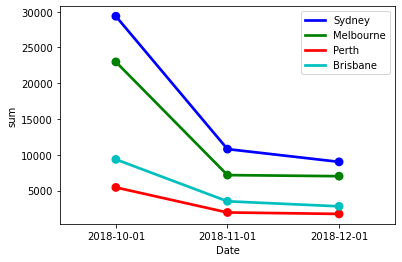

In [67]:
f, ax = plt.subplots(1, 1)
ax = sns.pointplot(x='Date', y='sum', data=syd_posting_ms, color='b')
ax1 = sns.pointplot(x='Date', y='sum', data=melb_posting_ms, color='g')
ax2 =sns.pointplot(x='Date', y='sum', data=perth_posting_ms, color='r')
ax3 = sns.pointplot(x='Date', y='sum', data=bris_posting_ms, color='c')
ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])
ax.legend(handles=ax.lines[::len(syd_posting_ms)+1], labels=["Sydney", "Melbourne", "Perth", "Brisbane"])
plt.show()

In [68]:
syd_posting = syd_posting.reset_index()
syd_posting

,Date,Location,count
0,2018-10-01,Sydney,266
1,2018-10-02,Sydney,605
2,2018-10-03,Sydney,1282
3,2018-10-04,Sydney,2052
4,2018-10-05,Sydney,1551
...,...,...,...
70,2018-12-12,Sydney,1622
71,2018-12-13,Sydney,1793
72,2018-12-14,Sydney,2678
73,2018-12-15,Sydney,291


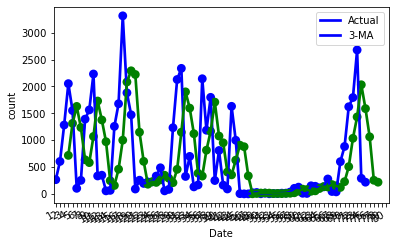

In [69]:
# Using moving average
def moving_average(df, k, to_period):
    moving_average_df = pd.DataFrame(columns=['Date','count'])
    num_df = len(df)
    for m in range(0, to_period):
        if m < k:
            sale_predict = float('nan')
        else:
            history = df['count'][m-k:m]
            sale_predict = history.mean()
        moving_average_df.loc[m] = [m+1, sale_predict]

    moving_average_df['Date'] = moving_average_df['Date'].astype(int)
    return moving_average_df

f, ax = plt.subplots(1, 1)
ma_df = moving_average(syd_posting, 3, 80)
sns.pointplot(x='Date', y='count', data=syd_posting, color='b')
sns.pointplot(x='Date', y='count', data=ma_df, color='g')
ax.legend(handles=ax.lines[::len(syd_posting_ms)+1], labels=["Actual", "3-MA"])
plt.gcf().autofmt_xdate()
plt.show()

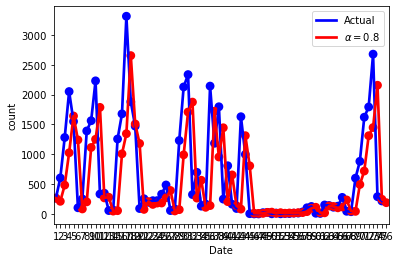

In [70]:
def exponential_smoothing(df, alpha):
    es_df = pd.DataFrame(columns=['Date','count'])
    es_df.loc[0] = [1, df['count'][0]]
    num_df = len(df)
    for m in range(0, num_df):
        sale_predict = alpha * df['count'][m] + (1-alpha) * es_df['Date'][m]
        es_df.loc[m+1] = [m+2, sale_predict]
        
    es_df['Date'] = es_df['Date'].astype(int)
    return es_df

f, ax = plt.subplots(1, 1)
es_df_08 = exponential_smoothing(syd_posting, 0.8)
sns.pointplot(ax=ax, x='Date', y='count', data=syd_posting, color='b')
sns.pointplot(ax=ax, x='Date', y='count', data=es_df_08, color='r')

ax.legend(handles=ax.lines[::len(syd_posting)+2], labels=["Actual", r"$\alpha=0.8$"])
plt.show()

In [71]:
from datetime import datetime

    count  Period Season  Seq
0     266       1      I    1
1     605       2      I    2
2    1282       3      I    3
3    2052       4      I    4
4    1551       5      I    1
..    ...     ...    ...  ...
70   1622      71    III    3
71   1793      72    III    4
72   2678      73    III    1
73    291      74    III    2
74    219      75    III    3

[75 rows x 4 columns]
Season  Seq           I     II    III
0         1  773.111111  741.0  691.4
1         2  545.777778  965.0  342.0
2         3  560.000000  851.6  431.4
3         4  913.250000  574.2  395.0


/Users/katyang/opt/miniconda3/envs/3803ict/lib/python3.7/site-packages/ipykernel_launcher.py:47: RankWarning: Polyfit may be poorly conditioned


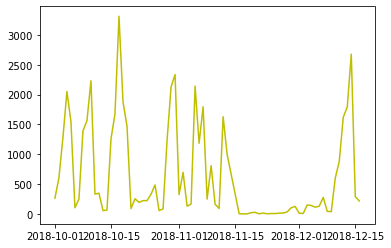

In [72]:
# 18,37,56,75
def get_season(row):
    if row['Period'] >= 18 and row['Period'] <= 37:
        return 'II'
    elif row['Period'] >= 56 and row['Period'] <= 75:
        return 'III'
    else:
        return 'I'

def get_seq(row):
    return row['Period']%4 and row['Period']%4 or 4

def predict_with_seasonality(df, months):
    new_df = df.copy()
    new_df['Period'] = new_df.index + 1
    new_df = new_df.drop(columns=['Location', 'Date'])
    new_df['Season'] = new_df.apply(get_season, axis=1)
    new_df['Seq'] = new_df.apply(get_seq, axis=1)
    print(new_df)
    
    season_df = new_df.pivot_table(index='Seq', columns='Season', values='count')
    season_df = season_df.reset_index()
    print(season_df)
    season_df.index = season_df['Seq']
    season_df = season_df.drop(['Seq'], axis=1)
    
    avg_df = season_df.apply(np.mean)
    
    seasonal_index_df = pd.DataFrame(columns=['I','II','III'])
    seasonal_index_df['I'] = season_df['I']/avg_df['I']
    seasonal_index_df['II'] = season_df['II']/avg_df['II']
    seasonal_index_df['III'] = season_df['III']/avg_df['III']
    seasonal_index_df['Avg'] = seasonal_index_df.mean(axis=1)
    
    season = np.array([1,2,3])
    avg_arr = np.array([avg_df['I'], avg_df['II'], avg_df['III']])
    fit = np.polyfit(season, avg_arr, 3)
    poly = np.poly1d(fit)
    average_predict = poly(4)
    forecast_df = pd.DataFrame(columns=['Period','Sales'])
    
    forecast_df['count'] = seasonal_index_df['Avg']*average_predict
    forecast_df['Period'] = months
    forecast_df.index = np.array(months) - 1
    return forecast_df

season_df = predict_with_seasonality(syd_posting, [76,77,78,79])

f, ax = plt.subplots(1, 1)
plt.plot(syd_posting['Date'], syd_posting['count'], c='y')
plt.plot(season_df['Period'], season_df['Sales'], c='r')
plt.show()

## Part 3 - Evaluation

#### 1) What are the findings of your data analytics for the above sections?





#### 2) What actions for balancing the markets do you suggest based on your findings?




#### 3) How could you refine your data analytics?

The analysis from the dataset provides insights for [something]. However, it is not suitable for sentiment analysis since most job advertisements are written in a neutral tone. For example, Reddit is a popular social media platform since users can form communities with people with similar hobbies, interests, or occupations. A survey from a particular community for different work field can be used for further analysis such as job satisfaction, working hours and required skills. 

#### 4) Are there any implications for employers and employees based on the findings you obtained? Justify your answer.



